**Clustering avec Kmeans**

Les données à regrouper

In [23]:
import pandas as pd

df_employes=pd.DataFrame([[1200,25],
                 [1300,27],
                 [1100,27],
                 [2500,49],
                 [2400,47],
                 [2600,45]], 
                 columns=['salaire','age'])

Apprentissage avec Kmeans

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_employes)

KMeans(n_clusters=2)

Test avec donénes de test

In [25]:
employe_new=pd.DataFrame([[1300.67,28]], columns=['salaire','age'])
employe_new

,salaire,age
0,1300.67,28


In [26]:
#
kmeans.predict(employe_new)
kmeans.cluster_centers_


array([[1200.        ,   26.33333333],
       [2500.        ,   47.        ]])

**Clustering des données réelles**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
data_path='/content/drive/MyDrive/Colab Notebooks/irm2/employes.csv'

In [28]:
data_path="./data/employes (1).csv"

Charger les données CSV employes.csv à partir de Google Drive

In [29]:
#
df_employes=pd.read_csv(data_path, index_col=0, header=0)
df_employes

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


Transformer les données de format brute en format numérique

In [30]:
df_ = df_employes.copy()
df_

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


In [31]:
# fill missing values
df_.fillna({'salaire':df_['salaire'].mean(),'prime':df_['prime'].mean()}, inplace=True)
df_


,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,20/10/2018
Sonia,2800.786000,400.876000,marie,30/11/2005
Rahma,2192.082091,130.987000,celibataire,04/02/2017
Salma,2500.876000,340.600000,marie,03/02/2010
Ahmed,3100.760000,257.165889,marie,09/09/2004
Saleh,1300.876000,150.900000,celibataire,01/01/2017
Ameni,1100.660000,130.870000,celibataire,11/05/2019
Mehdi,3000.760000,257.165889,marie,07/07/2000
Salem,1505.760000,159.700000,celibataire,21/11/2017


In [32]:
df_['date recrutement']=pd.to_datetime(df_['date recrutement'])
df_

C:\Users\MSI\AppData\Local\Temp\ipykernel_17840\2022768527.py:1: UserWarning: Parsing '20/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement']=pd.to_datetime(df_['date recrutement'])
C:\Users\MSI\AppData\Local\Temp\ipykernel_17840\2022768527.py:1: UserWarning: Parsing '30/11/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement']=pd.to_datetime(df_['date recrutement'])
C:\Users\MSI\AppData\Local\Temp\ipykernel_17840\2022768527.py:1: UserWarning: Parsing '21/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement']=pd.to_datetime(df_['date recrutement'])
C:\Users\MSI\AppData\Local\Temp\ipykernel_17840\2022768527.py:1: UserWarning: Parsing '19/02/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['dat

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20
Sonia,2800.786000,400.876000,marie,2005-11-30
Rahma,2192.082091,130.987000,celibataire,2017-04-02
Salma,2500.876000,340.600000,marie,2010-03-02
Ahmed,3100.760000,257.165889,marie,2004-09-09
Saleh,1300.876000,150.900000,celibataire,2017-01-01
Ameni,1100.660000,130.870000,celibataire,2019-11-05
Mehdi,3000.760000,257.165889,marie,2000-07-07
Salem,1505.760000,159.700000,celibataire,2017-11-21


In [33]:
from datetime import datetime
df_['anciennete']=df_['date recrutement'].apply(lambda x: datetime.now().year-x.year)
df_

,salaire,prime,etat civil,date recrutement,anciennete
nom,,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20,4
Sonia,2800.786000,400.876000,marie,2005-11-30,17
Rahma,2192.082091,130.987000,celibataire,2017-04-02,5
Salma,2500.876000,340.600000,marie,2010-03-02,12
Ahmed,3100.760000,257.165889,marie,2004-09-09,18
Saleh,1300.876000,150.900000,celibataire,2017-01-01,5
Ameni,1100.660000,130.870000,celibataire,2019-11-05,3
Mehdi,3000.760000,257.165889,marie,2000-07-07,22
Salem,1505.760000,159.700000,celibataire,2017-11-21,5


In [34]:
df_.drop(['date recrutement'], axis=1, inplace=True,errors='ignore')
df_

,salaire,prime,etat civil,anciennete
nom,,,,
Ali,1200.675000,100.560000,celibataire,4
Sonia,2800.786000,400.876000,marie,17
Rahma,2192.082091,130.987000,celibataire,5
Salma,2500.876000,340.600000,marie,12
Ahmed,3100.760000,257.165889,marie,18
Saleh,1300.876000,150.900000,celibataire,5
Ameni,1100.660000,130.870000,celibataire,3
Mehdi,3000.760000,257.165889,marie,22
Salem,1505.760000,159.700000,celibataire,5


In [35]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()
ohe.fit(df_[['etat civil']])

OneHotEncoder()

In [36]:
ohe.categories_

[array(['celibataire', 'marie'], dtype=object)]

In [39]:
etat_civil_sparse= ohe.transform(df_[['etat civil']])
etat_civil=etat_civil_sparse.toarray()
etat_civil

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [40]:
df_etat_civil=pd.DataFrame(etat_civil, index=df_.index, columns=['etat civil celib', 'etat civil marie'])

In [42]:
df_=pd.concat([df_, df_etat_civil], axis=1)

In [43]:
df_.drop(['etat civil'], axis=1, inplace=True,errors='ignore')

In [44]:
df_

,salaire,prime,anciennete,etat civil celib,etat civil marie
nom,,,,,
Ali,1200.675000,100.560000,4,1.0,0.0
Sonia,2800.786000,400.876000,17,0.0,1.0
Rahma,2192.082091,130.987000,5,1.0,0.0
Salma,2500.876000,340.600000,12,0.0,1.0
Ahmed,3100.760000,257.165889,18,0.0,1.0
Saleh,1300.876000,150.900000,5,1.0,0.0
Ameni,1100.660000,130.870000,3,1.0,0.0
Mehdi,3000.760000,257.165889,22,0.0,1.0
Salem,1505.760000,159.700000,5,1.0,0.0


Normaliser les données

In [ ]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
ss.fit(X_)
X_ss=ss.transform(X_)
X_ss

array([[-1.1937301 , -0.97166562,  1.        , -1.        ],
       [ 0.78237727,  0.48583281, -1.        ,  1.        ],
       [-0.13120369, -0.85955036,  1.        , -1.        ],
       [ 0.40784765, -0.07474351, -1.        ,  1.        ],
       [ 0.94486403,  0.59794807, -1.        ,  1.        ],
       [-1.03719413, -0.85955036,  1.        , -1.        ],
       [-1.26621095, -1.08378088,  1.        , -1.        ],
       [ 0.84088175,  1.04640913, -1.        ,  1.        ],
       [-0.81500063, -0.85955036,  1.        , -1.        ],
       [ 0.67700994,  1.15852439, -1.        ,  1.        ],
       [-1.03057057, -0.63531983,  1.        , -1.        ],
       [ 1.82092943,  2.05544651, -1.        ,  1.        ]])

Réduire les dimensions des données

In [ ]:
#

array([[-2.08283845, -0.070833  ],
       [ 1.63874567, -0.38377126],
       [-1.49652918,  0.3748481 ],
       [ 1.17638784, -0.87305816],
       [ 1.77501009, -0.25506935],
       [-1.94954959,  0.05577314],
       [-2.17409741, -0.16783631],
       [ 1.94308214, -0.00578323],
       [-1.83844666,  0.13402604],
       [ 1.91615821,  0.00798055],
       [-1.83620459,  0.20105933],
       [ 2.92828192,  0.98266416]])

Regrouper les données clusters avec Kmeans

In [ ]:
#

KMeans(n_clusters=2)

Prédire les labels des clusters

In [ ]:
#

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

Déterminer les clusters

In [ ]:
#

array([[-2.08283845, -0.070833  ],
       [-1.49652918,  0.3748481 ],
       [-1.94954959,  0.05577314],
       [-2.17409741, -0.16783631],
       [-1.83844666,  0.13402604],
       [-1.83620459,  0.20105933]])

In [ ]:
#

array([[ 1.63874567, -0.38377126],
       [ 1.17638784, -0.87305816],
       [ 1.77501009, -0.25506935],
       [ 1.94308214, -0.00578323],
       [ 1.91615821,  0.00798055],
       [ 2.92828192,  0.98266416]])

Visualiser les données sur un plan 2D colorées selon leurs appartenances aux clusters

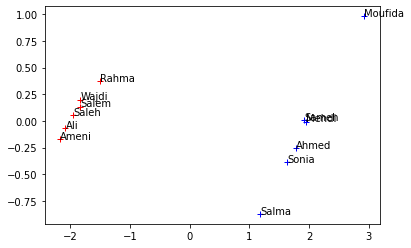

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'r+', label='Cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'b+', label='Cluster 1')

for nom, x, y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")